In [2]:
module RBM
using Winston

export dream
export showWeights

function xp(x)
    return 1.0 ./ (1+exp(-x))
end

function vtohprob(rbmw::Matrix{Float64},vstate::Matrix{Int64})
    return xp(rbmw * vstate)
end

function htovprob(rbmw::Matrix{Float64},hstate::Matrix{Int64})
    return xp(rbmw' * hstate)
end

function gradient{T}(vstate::Matrix{Int64},hstate::Matrix{T})
    hstate * vstate'/size(vstate)[2]
end

function bernoulli{T}(v::Vector{T})
    return map((x)->x>rand()?1:0,v)
end

function bernoulli{T}(m::Matrix{T})
    return map((x)->x>rand()?1:0,m)
end

function cd(rbmw::Matrix{Float64},data::Matrix{Float64})
    vdata=bernoulli(data)
    h0=bernoulli(vtohprob(rbmw,vdata))
    vh0=gradient(vdata,h0)
    v1=bernoulli(htovprob(rbmw,h0))
    h1=bernoulli(vtohprob(rbmw,v1))
    vh1=gradient(v1,h1)
    return vh0-vh1
end

function showWeights(W::Matrix{Float64},row,col)
    r,c = size(W)
    plots = []
    for i in 1:r
        plots=vcat(plots,Winston.imagesc((reshape(W[i,:],28,28))'))
    end
    
    mgrid=Winston.Table(row,col)
    c=1
    for i = 1:row
        for j=1:col
            mgrid[i,j] = plots[c]
            c+=1
        end
    end  
    display(mgrid)
end

function dream(rbmw::Matrix{Float64},data::Matrix{Float64})
    vdata=bernoulli(data)
    h0=bernoulli(vtohprob(rbmw,vdata))
    v1=bernoulli(htovprob(rbmw,h0))
  
    rw = size(vdata)[2]
    mgrid = Winston.Table(1,2)
    for i in 1:rw
        p1=Winston.imagesc(reshape(vdata[:,i],28,28)')
        p2=Winston.imagesc(reshape(v1[:,i],28,28)')
        mgrid[1,1]=p1
        mgrid[1,2]=p2
        display(mgrid)
    end
    return v1
end

function rbm(nhid::Int,data::Matrix{Float64},lr::Float64,niter::Int64,mbatchsz::Int64,mom::Float64)
    psz,nsz=size(data)
    momentum=mom
    if nsz % mbatchsz != 0
        println("test cases must be multiple of batch size")
        return
    end
    model=(rand(nhid,psz)*2-1)*0.1
    momSpeed=zeros(nhid,psz)

    startMini=1
    for iter in 1:niter
        if mod(iter,50)==0
            println("iter:",iter," ",sqrt(mean(map((x)->x*x,model))))
        end
        mbatch=data[:,startMini:(startMini+mbatchsz-1)]
        startMini=(startMini+mbatchsz) % nsz
        gradient=cd(model,mbatch)
        momSpeed=momentum*momSpeed+gradient
        model=model+momSpeed*lr
    end
    return model
end
end

RBM

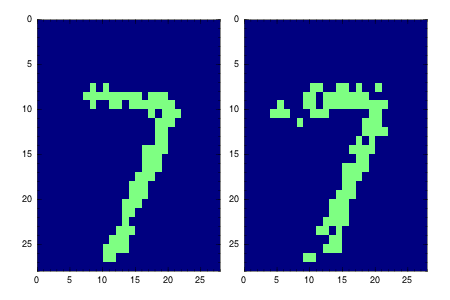

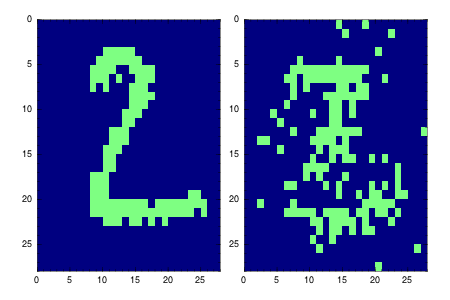

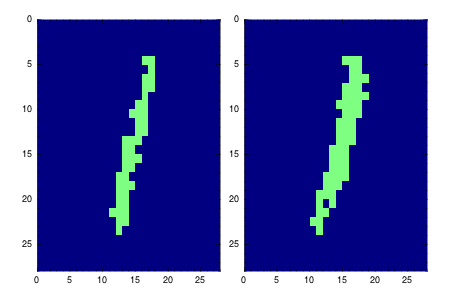

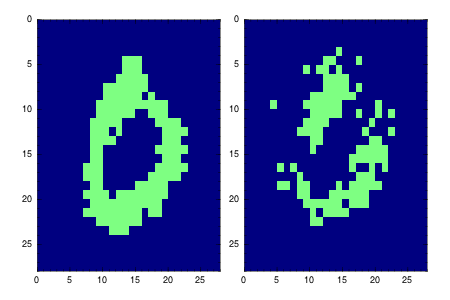

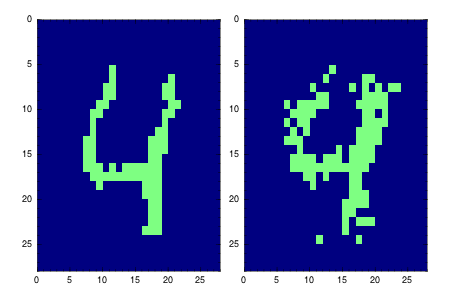

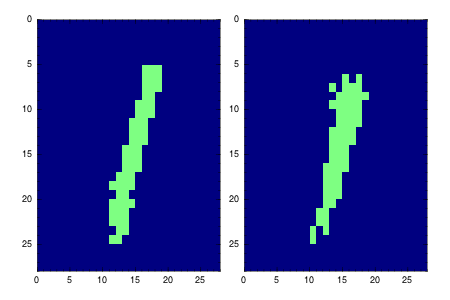

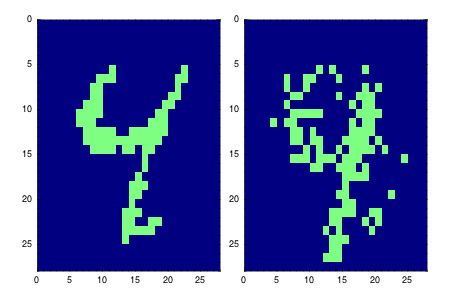

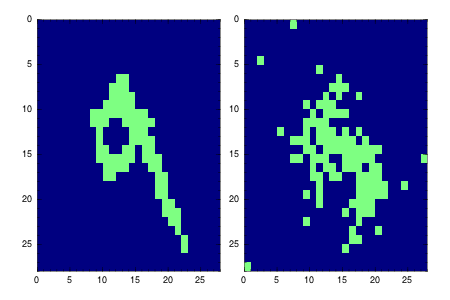

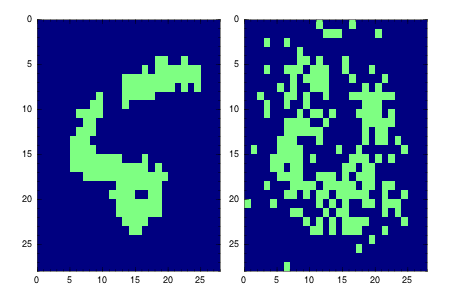

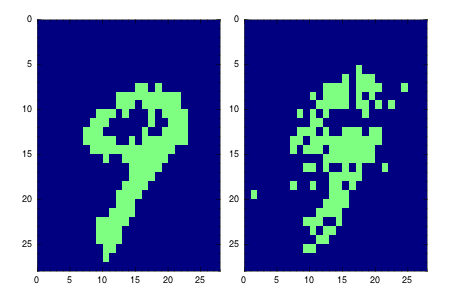

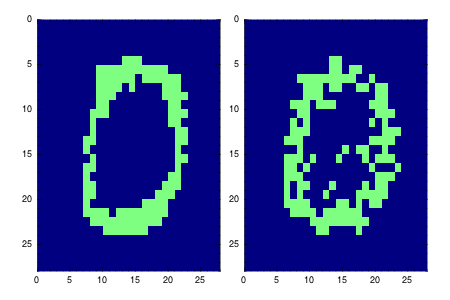

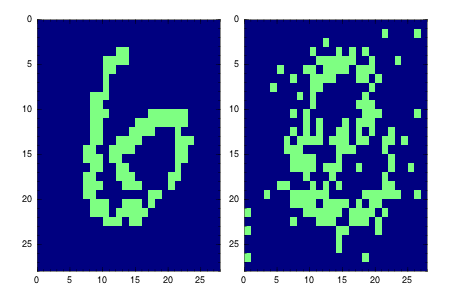

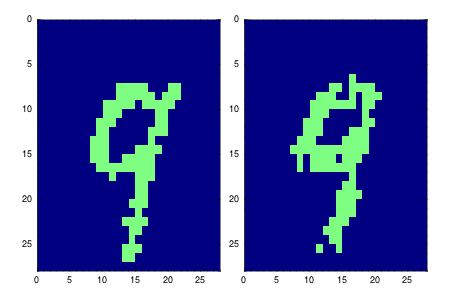

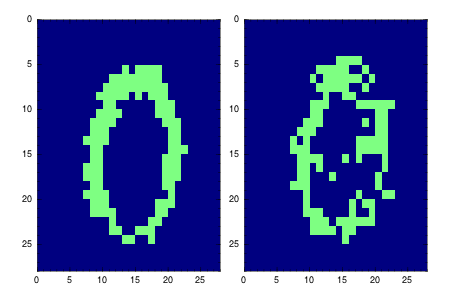

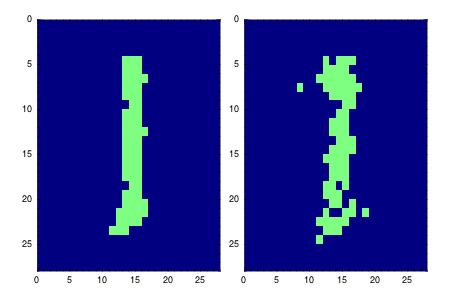

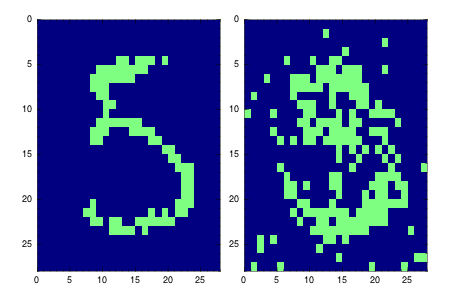

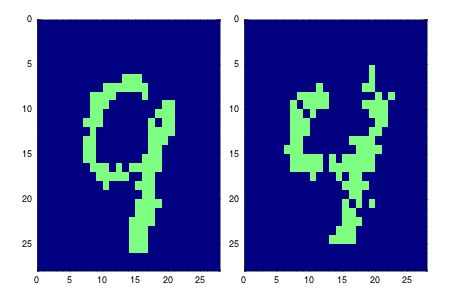

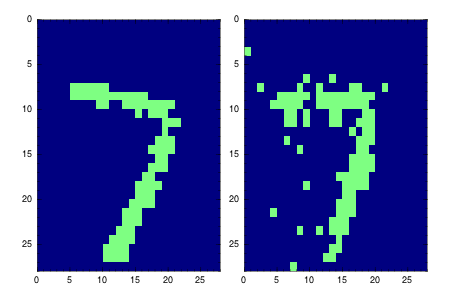

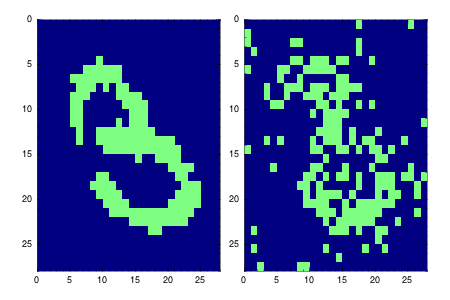

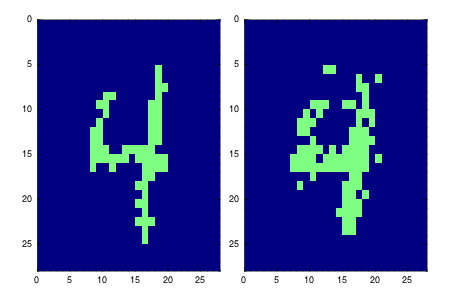

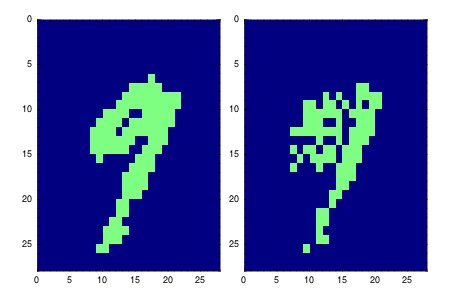

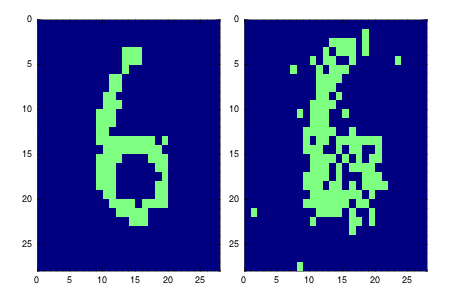

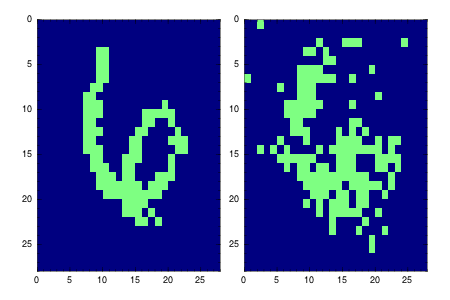

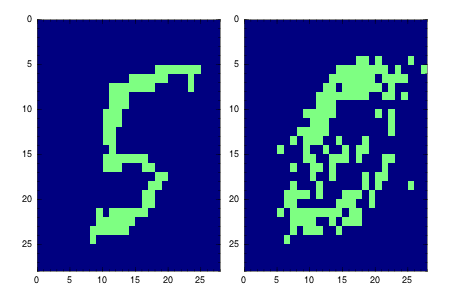

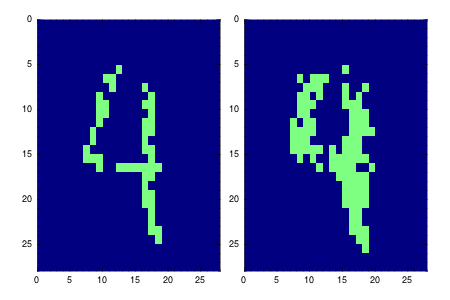

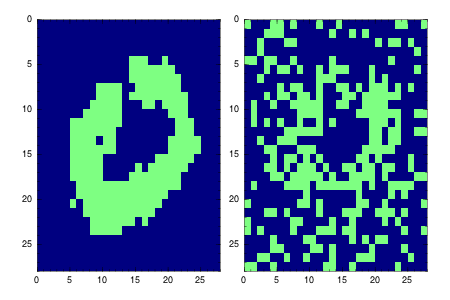

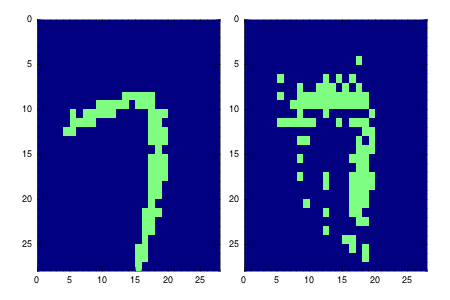

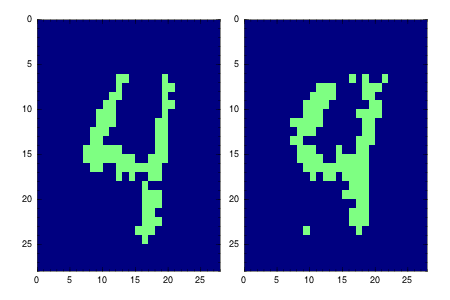

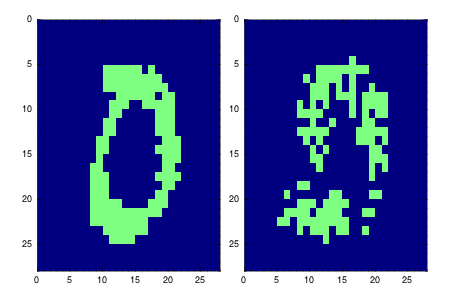

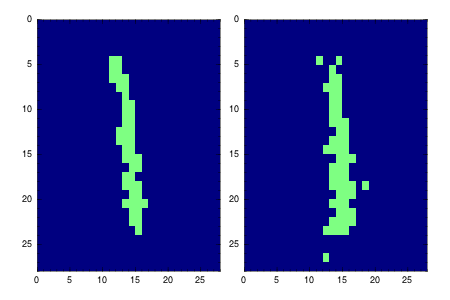

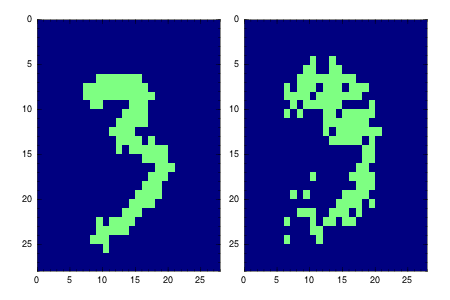

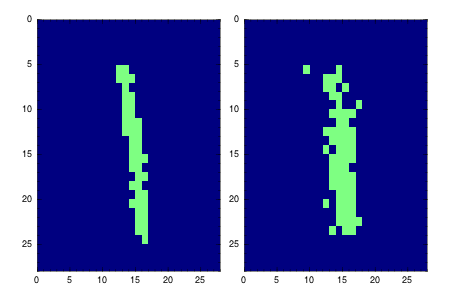

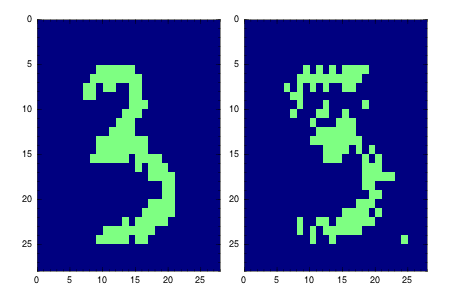

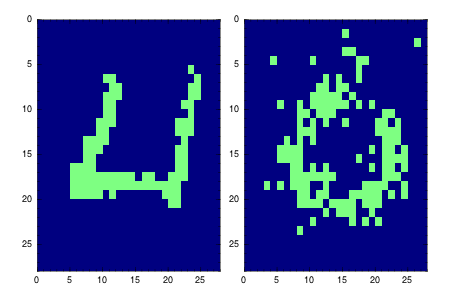

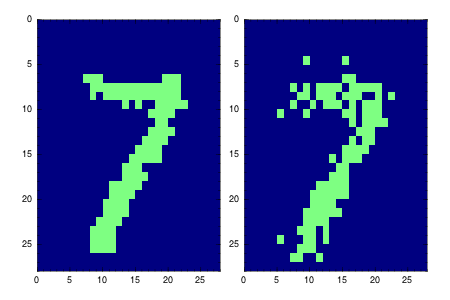

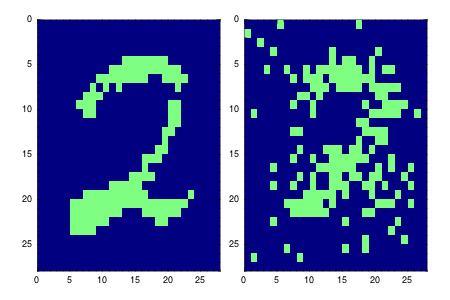

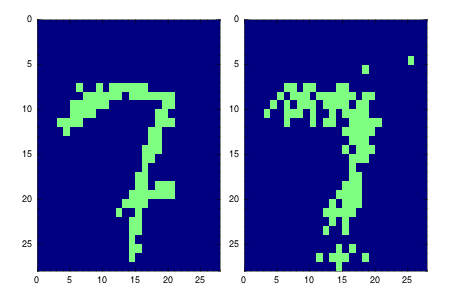

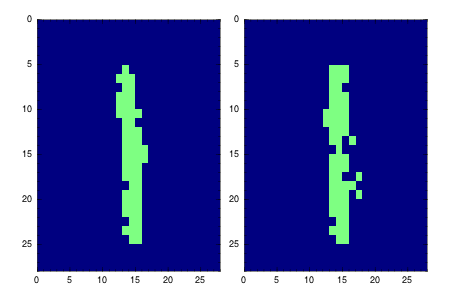

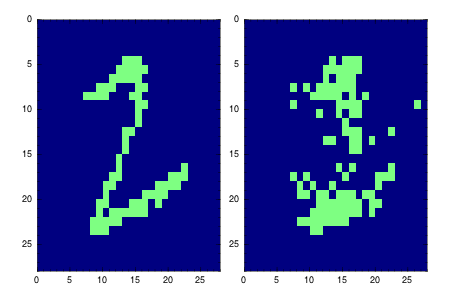

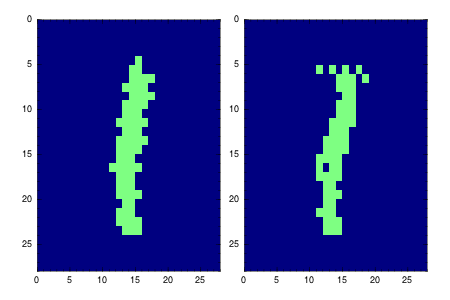

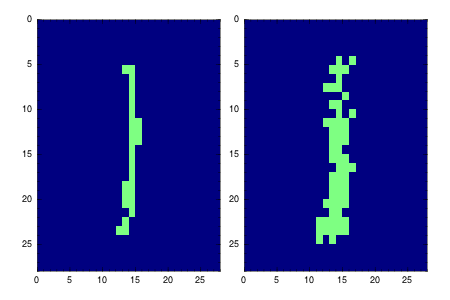

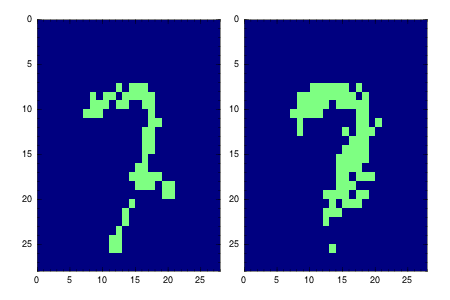

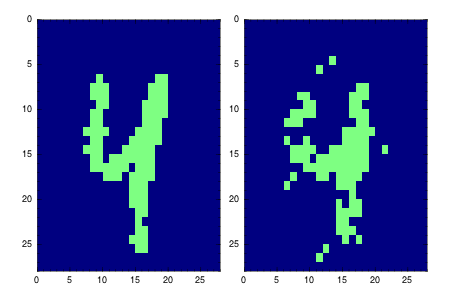

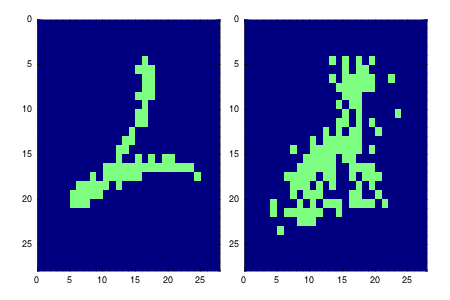

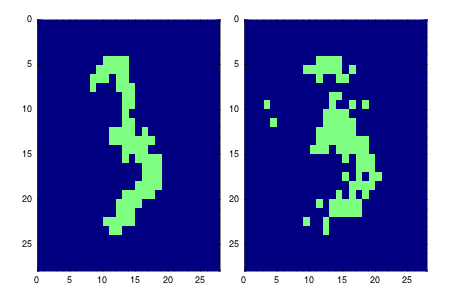

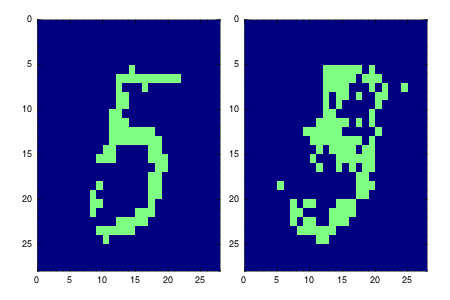

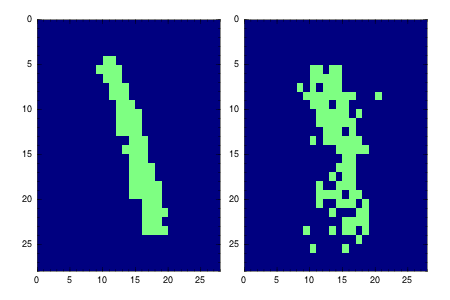

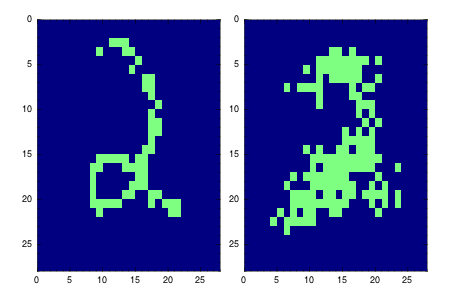

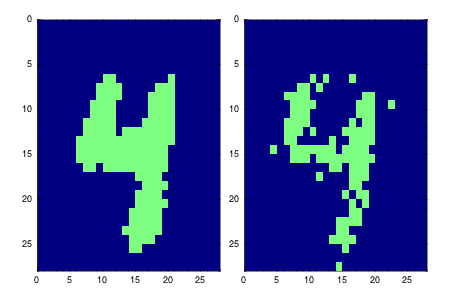

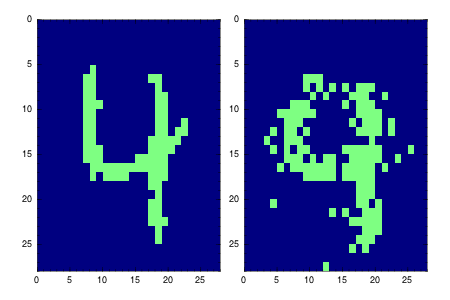

In [5]:
using RBM
#trainData=readdlm("/Users/ppalmes/juliaDemos/JuliaHTML/mnist_train.csv",',',Float64)
#trainLab=trainData[:,1]
#trainData=trainData[:,2:size(trainData)[2]]/255.0
#trainData=trainData'

testData=readdlm("/Users/ppalmes/juliaDemos/JuliaHTML/mnist_test.csv",',',Float64)
testLab=testData[:,1]
testData=testData[:,2:size(testData)[2]]/255.0
testData=testData'

hidSz=30
mbatchsz=100
#niter=20000
niter = 500
lr=0.01
mom=0.9

#W=RBM.rbm(hidSz,trainData,lr,niter,mbatchsz,mom)

W=readcsv("/Users/ppalmes/juliaDemos/JuliaHTML/weighnobias.csv")

RBM.dream(W,testData[:,1:50]);



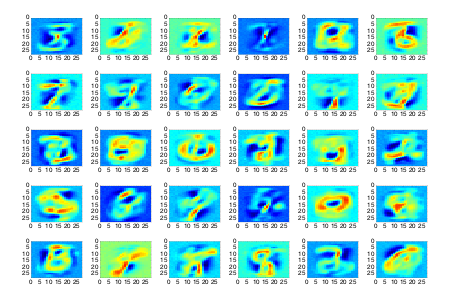

In [6]:
RBM.showWeights(W,5,6)